In [5]:
# MNIST Handwritten Digit Classification with CNN

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 42s - 99ms/step - accuracy: 0.9227 - loss: 0.2537 - val_accuracy: 0.9765 - val_loss: 0.0755
Epoch 2/10
422/422 - 39s - 93ms/step - accuracy: 0.9789 - loss: 0.0679 - val_accuracy: 0.9862 - val_loss: 0.0477
Epoch 3/10
422/422 - 41s - 97ms/step - accuracy: 0.9854 - loss: 0.0468 - val_accuracy: 0.9880 - val_loss: 0.0414
Epoch 4/10
422/422 - 42s - 100ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 5/10
422/422 - 40s - 94ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9852 - val_loss: 0.0498
Epoch 6/10
422/422 - 41s - 96ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9888 - val_loss: 0.0380
Epoch 7/10
422/422 - 41s - 97ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 8/10
422/422 - 39s - 93ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9900 - val_loss: 0.0355
Epoch 9/10
422/422 - 41s - 97ms/step - accuracy: 0.9956 - loss: 0.0131 - val_accuracy: 0.9898 -

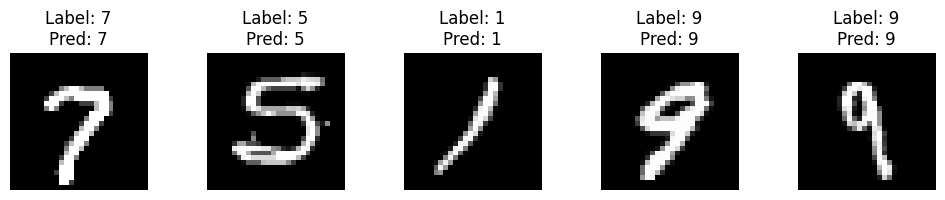

In [6]:
# MNIST Handwritten Digit Classification with CNN

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. Preprocess data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# 3. Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

# 5. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# 6. Visualize predictions
sample_idx = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[sample_idx]
sample_labels = y_test[sample_idx]
preds = model.predict(sample_images, verbose=0)
pred_digits = np.argmax(preds, axis=1)

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {sample_labels[i]}\nPred: {pred_digits[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()